In [3]:
#package import
import pandas as pd
import numpy as np
#import seaborn as sns

from sklearn import model_selection
from keras import models, layers
from keraspp import skeras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
def main():
    machine = Machine()
    machine.run(epochs = 400)

In [5]:
class Machine():
    def __init__(self):
        self.data = Dataset()
        shape = self.data.X.shape[1:]
        print(shape)
        self.model = rnn_model(shape)
        
    def run(self,epochs = 400):
        d = self.data
        X_train, X_test = d.X_train, d.X_test
        y_train, y_test = d.y_train, d.y_test
        X, y = d.X, d.y
        
        m = self.model
        h = m.fit(X_train, y_train, epochs = epochs,
                 validation_data=[X_test,y_test])
        
        skeras.plot_loss(h)
        
        plt.title('History of training')
        plt.show()
        
        yp = m.predict(X_test)
        print("Loss : ", m.evaluate(X_test, y_test))
        plt.plot(yp, label = 'Original')
        plt.plot(y_test, label = "Prediction")
        plt.legend(loc=0)
        plt.title("All Results")
        plt.show()
        

In [6]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    m.compile('adam','mean_squared_error')
    
    m.summary()
    
    return m

In [7]:
class Dataset:
    def __init__(self, fname='international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test   


def load_data(fname='international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn


def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y


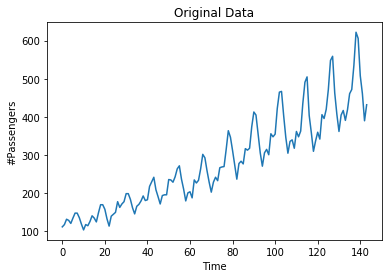

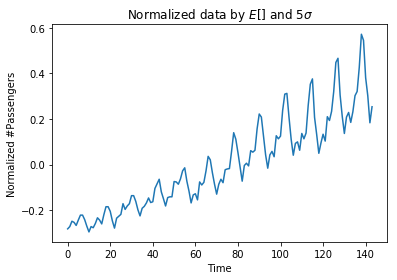

(131, 12, 1) (131,)
(12, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Train on 104 samples, validate on 27 samples
Epoch 1/400
104/104 [==============================] - 2s 20ms/step - loss: 0.0499 - val_loss: 0.0463
Epoch 2/400
104/104 [==============================] - 0s 374us/step - loss: 0.0466 - val_loss: 0.0436
Epoch 3/400
104/104 [==============================] - 0s 484us/step - loss: 0.0436 - val_loss: 0.0411
Epoch 4/400
104/104 [======

104/104 [==============================] - 0s 547us/step - loss: 0.0062 - val_loss: 0.0067
Epoch 73/400
104/104 [==============================] - 0s 493us/step - loss: 0.0062 - val_loss: 0.0068
Epoch 74/400
104/104 [==============================] - 0s 935us/step - loss: 0.0062 - val_loss: 0.0067
Epoch 75/400
104/104 [==============================] - 0s 518us/step - loss: 0.0062 - val_loss: 0.0066
Epoch 76/400
104/104 [==============================] - 0s 446us/step - loss: 0.0062 - val_loss: 0.0066
Epoch 77/400
104/104 [==============================] - 0s 586us/step - loss: 0.0062 - val_loss: 0.0066
Epoch 78/400
104/104 [==============================] - 0s 633us/step - loss: 0.0061 - val_loss: 0.0067
Epoch 79/400
104/104 [==============================] - 0s 484us/step - loss: 0.0061 - val_loss: 0.0067
Epoch 80/400
104/104 [==============================] - 0s 901us/step - loss: 0.0061 - val_loss: 0.0068
Epoch 81/400
104/104 [==============================] - 0s 901us/step - loss:

104/104 [==============================] - 0s 489us/step - loss: 0.0048 - val_loss: 0.0055
Epoch 151/400
104/104 [==============================] - 0s 633us/step - loss: 0.0048 - val_loss: 0.0053
Epoch 152/400
104/104 [==============================] - 0s 489us/step - loss: 0.0047 - val_loss: 0.0052
Epoch 153/400
104/104 [==============================] - 0s 585us/step - loss: 0.0047 - val_loss: 0.0051
Epoch 154/400
104/104 [==============================] - 0s 633us/step - loss: 0.0046 - val_loss: 0.0052
Epoch 155/400
104/104 [==============================] - 0s 499us/step - loss: 0.0046 - val_loss: 0.0052
Epoch 156/400
 32/104 [========>.....................] - ETA: 0s - loss: 0.0051

KeyboardInterrupt: 

In [8]:
if __name__ == '__main__':
    main()